In [3]:
import pandas as pd
import numpy as np

from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Load the data

In [2]:
airport_operations = pd.read_csv("../../assets/datasets/airport_operations.csv")
airport_operations.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


## 2. Format and graph the data

#### 2.1 Plot the data

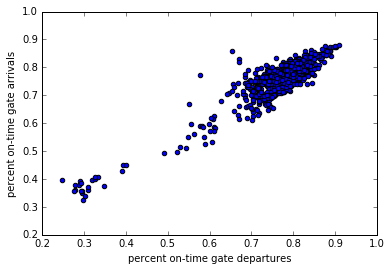

In [6]:
airport_operations.plot(
    kind='scatter', 
    x="percent on-time gate departures", 
    y="percent on-time gate arrivals"
)

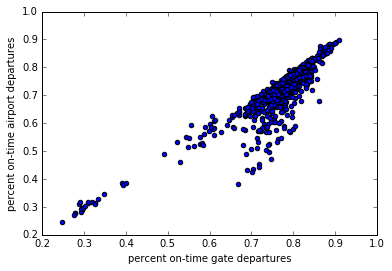

In [8]:
airport_operations.plot(
    kind='scatter', 
    x="percent on-time gate departures", 
    y="percent on-time airport departures"
)

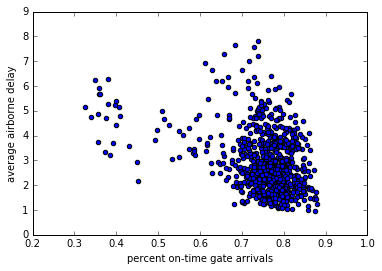

In [10]:
airport_operations.plot(
    kind='scatter', 
    x="percent on-time gate arrivals", 
    y="average airborne delay"
)

#### 2.2 Select columns of interest and standardize the data

In [16]:
X = airport_operations[[
    'percent on-time gate departures',
    'percent on-time airport departures',
    'percent on-time gate arrivals',
    'average_gate_departure_delay',
    'average_taxi_out_time',
    'average taxi out delay',
    'average airport departure delay',
    'average airborne delay',
    'average taxi in delay',
    'average block delay',
    'average gate arrival delay',
        
        
    ]]

X = StandardScaler().fit_transform(X)

In [17]:
print(X)

[[ 0.41670953  0.65820278  0.45978468 ..., -0.58849731 -0.76079377
  -0.70168278]
 [ 0.53460207  0.76985053  0.55704526 ..., -0.52044906 -0.9654201
  -0.84232194]
 [ 0.36633727  0.60583702  0.24702714 ..., -0.57715593 -0.65360855
  -0.48960786]
 ..., 
 [-3.99997364 -3.24452817 -3.94368837 ..., -1.52983138  0.49619655
   3.2161224 ]
 [-3.98389739 -3.32455885 -3.6835163  ..., -1.52983138 -0.41000577
   3.07548324]
 [-3.88743986 -3.26231277 -3.69081084 ..., -1.52983138  0.5449171
   3.33890262]]


## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

In [18]:
dbscn = DBSCAN(eps = .7, min_samples = 10).fit(X)  

#### 3.2 Calculate the Labels

In [19]:
labels = dbscn.labels_  

In [20]:
print(labels)

[ 0  0  0  0  0  0  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0 -1  0  0  0  0  0  0  0
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0  0  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0 -1  0  0  0 -1 -1  0 -1 -1 -1  0
 -1 -1 -1 -1

#### 3.3 Calculate the Core Samples

In [21]:
core_samples = np.zeros_like(labels, dtype = bool)  
core_samples[dbscn.core_sample_indices_] = True 

#### 3.4 Plot the resulting clusters

In [22]:
unique_labels = np.unique(labels)
colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))

/Users/arahuja/anaconda/lib/python2.7/site-packages/matplotlib/lines.py:1106: UnicodeWarning: Unicode unequal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  if self._markerfacecolor != fc:


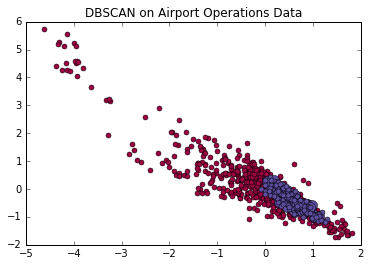

In [23]:
for (label, color) in zip(unique_labels, colors):
    class_member_mask = (labels == label)
    xy = X[class_member_mask & core_samples]
    plt.plot(xy[:,1],xy[:,3], 'o', markerfacecolor = color, markersize = 10)
    
    xy2 = X[class_member_mask & ~core_samples]
    plt.plot(xy2[:,1],xy2[:,3], 'o', markerfacecolor = color, markersize = 5)
plt.title("DBSCAN on Airport Operations Data")

Now, repeat the above steps for various levels of minimum points and epsilon and see how that affects the results of the DBSCAN algorithm 

#### 3.5 Perform a K-means Clustering for comparison

In [28]:
kmeans = KMeans(n_clusters = 9).fit(X)

In [29]:
labels_km = kmeans.labels_
centroids = kmeans.cluster_centers_

#### 3.6 Plot the resulting clusters

**Hint**: Display the results by cluster color and plot the centroids over the original plot for clarity

*Average airborne delay* and *on time gate arrivals*

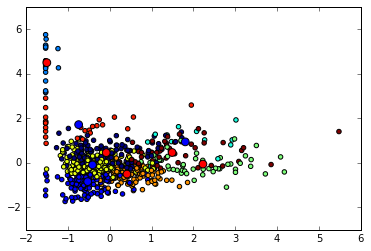

In [30]:
plt.scatter(X[:,8], X[:,3], c = labels_km)
plt.scatter(centroids[:,8], centroids[:,3], c = ["red","blue"], s = 60 )

*average taxi out time* and *average airport departure delay*

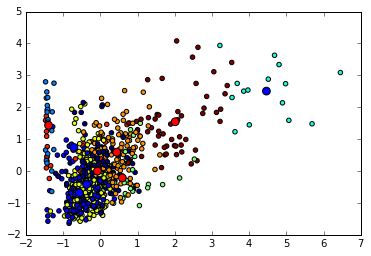

In [31]:
plt.scatter(X[:,5], X[:,7], c = labels_km)
plt.scatter(centroids[:,5], centroids[:,7], c = ["red","blue"], s = 60 )